In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.pylab as pit
import matplotlib
from matplotlib.pylab import rcParams
%matplotlib inline
from matplotlib import style
style.use('ggplot')
rcParams['figure.figsize'] = 20,10

In [2]:
#df = pd.dataframe.to_csv('ABT-JNJ.csv')
df = pd.DataFrame()
print(df)
df = pd.read_csv('C:/Users/archana.parihar/Downloads/ABTJNJ.csv', parse_dates=True,index_col=0)
print(df.head())

Empty DataFrame
Columns: []
Index: []
             open   high    low  close    volume Name
Date                                                 
2013-08-02  34.39  34.66  34.29  34.41  10237828  ABT
2013-11-02  34.42  34.49  34.24  34.26   7928236  ABT
2013-12-02  34.27  34.50  34.21  34.30   7070536  ABT
2013-02-13  34.29  34.58  34.25  34.46   6688100  ABT
2013-02-14  34.28  34.75  34.28  34.70   8561425  ABT


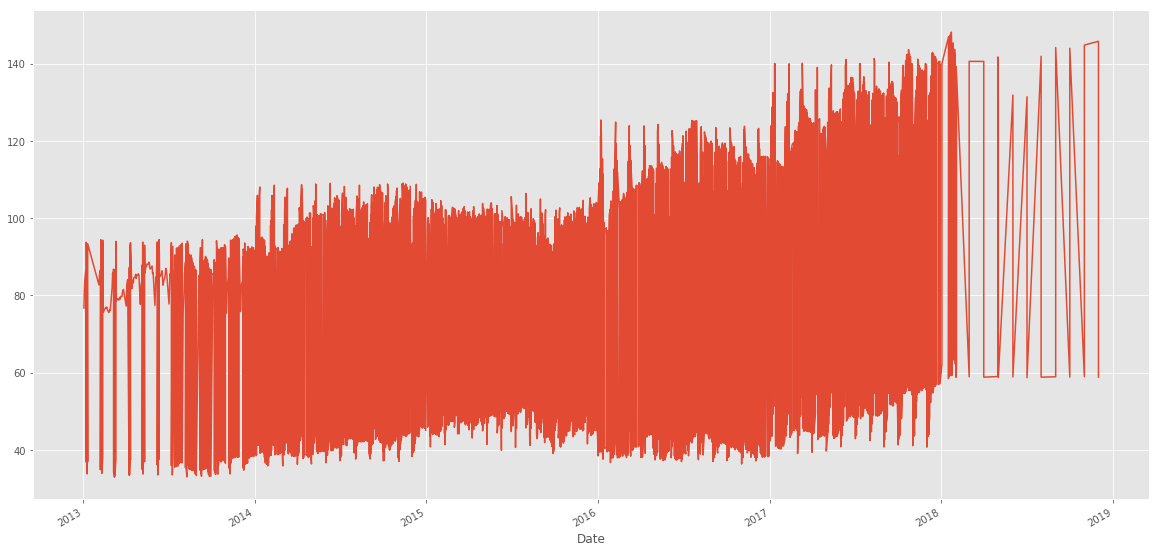

In [8]:
df['close'].plot()
plt.show()


Finding Moving Average
Create a new feature that will capture the moving average (of a particular feature like, close price)
of the past ##days based on the window given at rolling 
and see the plot of that 

In [4]:
#creating new feature '100MA' which stores the moving average of 'close' for past 100 days
df['100MA'] = df['close'].rolling(window=100).mean()
print(df.tail())

              open    high     low   close    volume Name     100MA
Date                                                               
2018-01-02  137.53  140.67  137.00  140.02   9393645  JNJ  139.1734
2018-02-02  139.02  140.36  137.38  137.68   9262508  JNJ  139.2181
2018-05-02  136.58  137.00  122.15  130.39  19954145  JNJ  139.1957
2018-06-02  130.01  132.99  128.00  131.83  19193520  JNJ  139.1895
2018-07-02  131.89  133.43  131.35  131.42  10550411  JNJ  139.1619


In [5]:
#remove the first 100 na rows from '100MA'
df.dropna(inplace = True)
print(df.head())

             open   high    low  close    volume Name    100MA
Date                                                          
2013-02-07  34.97  35.31  34.65  34.86   5795220  ABT  35.8524
2013-03-07  34.72  34.72  33.72  34.25   8381389  ABT  35.8508
2013-05-07  34.58  34.93  34.49  34.92   4664231  ABT  35.8574
2013-08-07  34.95  35.47  34.94  35.41   7545507  ABT  35.8685
2013-09-07  35.46  35.56  34.73  34.74  10291332  ABT  35.8713


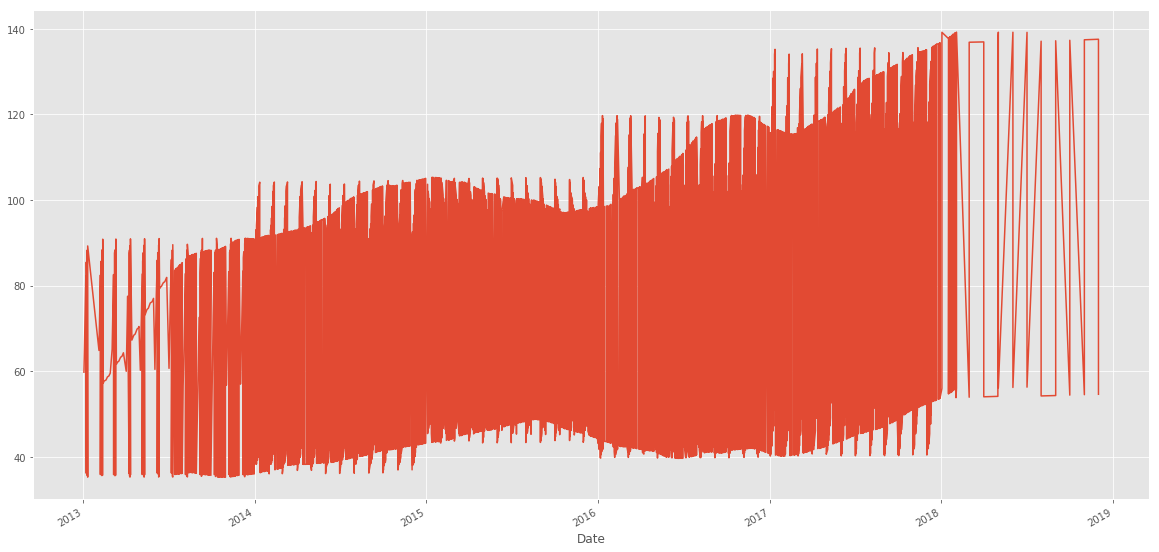

In [10]:
df['100MA'].plot()
plt.show()

# Plotting mean, std dev and close prices using rolling window

C:\Users\archana.parihar\AppData\Local\Continuum\anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


             open   high    low  close    volume Name    100MA  100SD
Date                                                                 
2013-02-07  34.97  35.31  34.65  34.86   5795220  ABT  35.8524    NaN
2013-03-07  34.72  34.72  33.72  34.25   8381389  ABT  35.8508    NaN
2013-05-07  34.58  34.93  34.49  34.92   4664231  ABT  35.8574    NaN
2013-08-07  34.95  35.47  34.94  35.41   7545507  ABT  35.8685    NaN
2013-09-07  35.46  35.56  34.73  34.74  10291332  ABT  35.8713    NaN


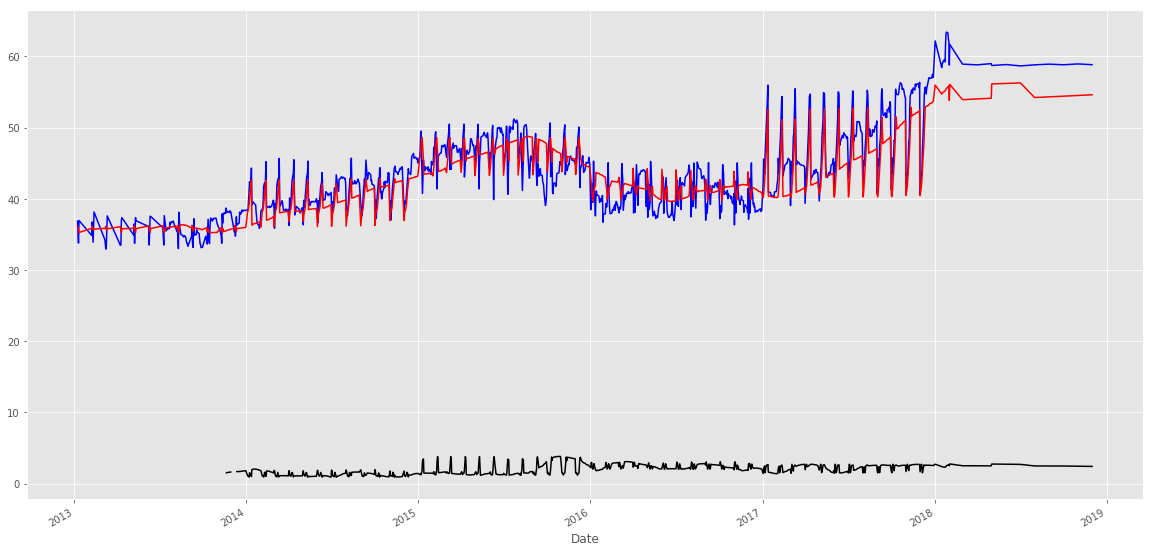

In [11]:
dfABT = df.loc[df['Name'] == 'ABT']

dfABT['100SD'] = dfABT['close'].rolling(window=100).std()
print(dfABT.head())
dfABT['close'].plot(color = 'blue',label='closePrice')
dfABT['100MA'].plot(color = 'red',label='Mean')
dfABT['100SD'].plot(color = 'black',label='SD')
#plt.plot(rolmean,color='red')
#plt.plot(dfABT,color = 'blue',label='closePrice')
plt.show(block=False)

# Augmented Dickey Fuller test 

In [12]:
from statsmodels.tsa.stattools import adfuller 
print('Results of Dickey Fuller test: ')
dftest = adfuller(dfABT['close'],autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','No of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
    
print(dfoutput)    
#pvalue should be very less ~ 0.5 

Results of Dickey Fuller test: 
Test Statistic               -0.846172
p-value                       0.805182
#lags used                    0.000000
No of observations used    1159.000000
Critical value (1%)          -3.436005
Critical value (5%)          -2.864037
Critical value (10%)         -2.568099
dtype: float64


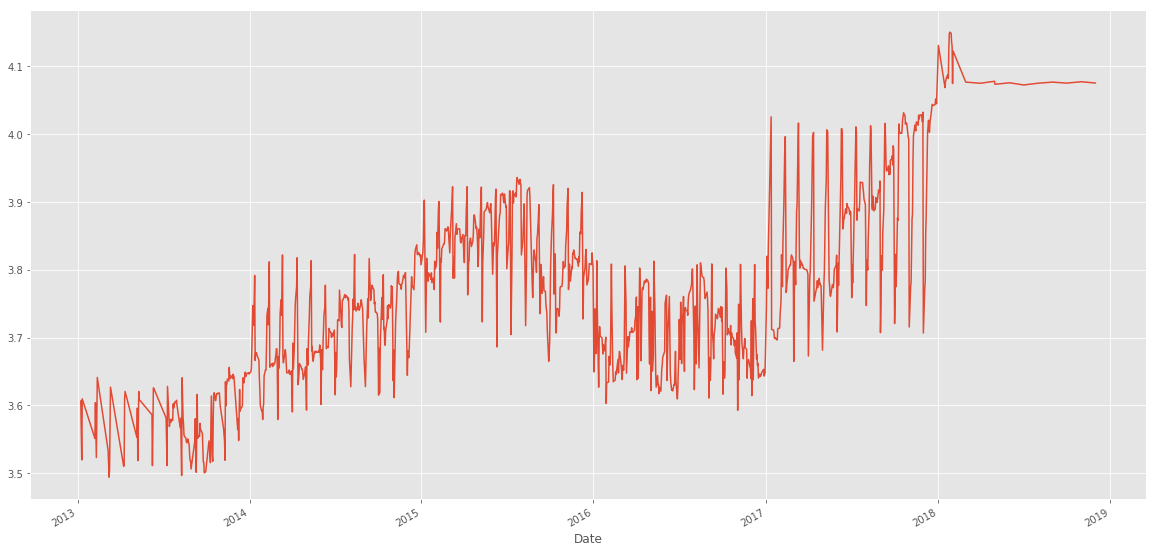

In [13]:
#Estimating the trend
dfABT_logScale = np.log(dfABT['close'])
dfABT_logScale.plot()


Date
2013-02-07    3.551340
2013-03-07    3.533687
2013-05-07    3.553060
2013-08-07    3.566994
2013-09-07    3.547892
Name: close, dtype: float64


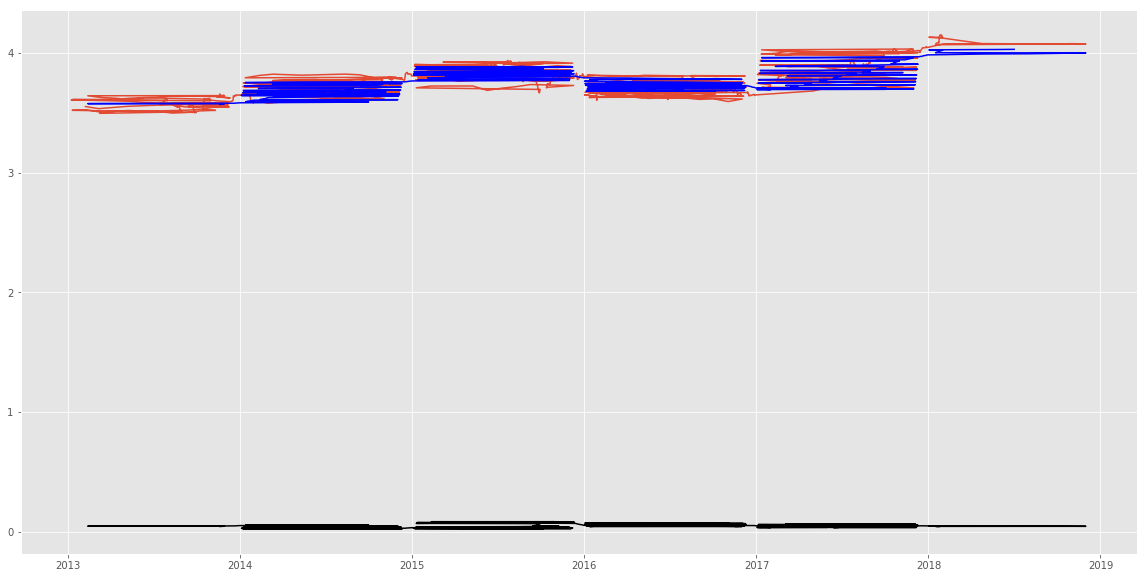

In [14]:
#moving average with log time series
#dfABT_logScale['100MA'] = dfABT_logScale.columns[0].rolling(window=100).mean()
print(dfABT_logScale.head())
ma = dfABT_logScale.rolling(window=100).mean()
mstd = dfABT_logScale.rolling(window=100).std()
plt.plot(dfABT_logScale)
plt.plot(ma,color = 'blue')
plt.plot(mstd, color= 'black')
#dfABT_logScale.rename(columns={"A": "close"})

In [15]:
#to make the time series stationary we first subtract log scale with ma (can also used by squaring values)
logScaleMinusMovingAverage = dfABT_logScale - ma
logScaleMinusMovingAverage.dropna(inplace=True)
logScaleMinusMovingAverage.head(10)

Date
2013-11-20    0.073068
2013-11-21    0.069302
2013-11-22    0.072915
2013-11-25    0.069412
2013-11-26    0.066589
2013-11-27    0.072153
2013-11-29    0.067808
2013-02-12    0.065744
2013-03-12    0.050859
2013-04-12    0.043939
Name: close, dtype: float64

Test Statistic               -3.523964
p-value                       0.007393
#lags used                    0.000000
No of observations used    1060.000000
Critical value (1%)          -3.436534
Critical value (5%)          -2.864270
Critical value (10%)         -2.568224
dtype: float64
Time series is most likely Stationary


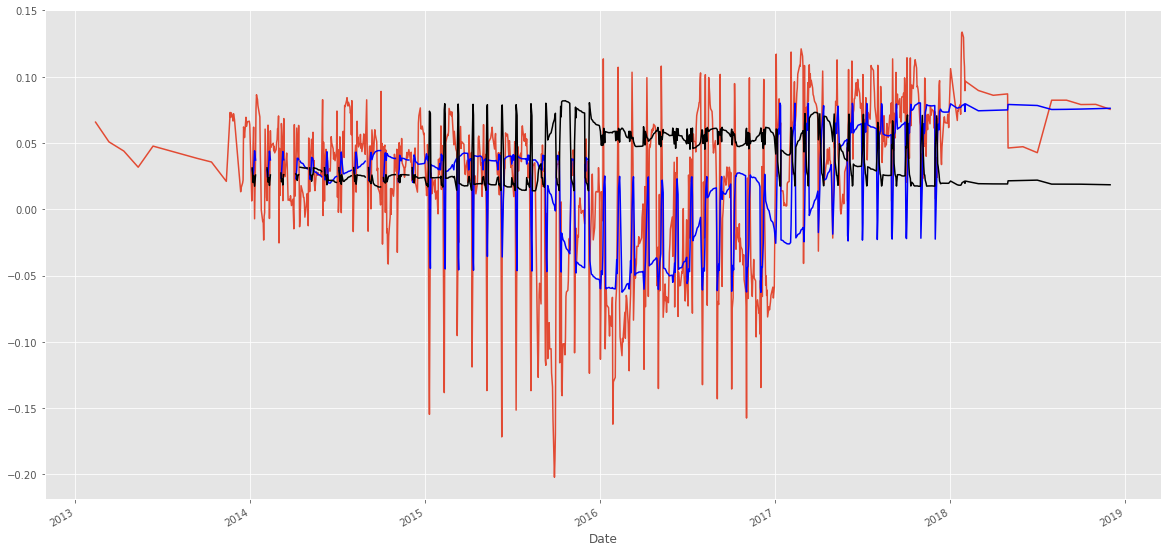

In [16]:
#Use log scale to make the timeseries stationary and then checked with ADF test 
# P value reduced significantly and critical value (1%) and test statistic is similar
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeSeries):
    
    #plot rolling statistics to visualize whether it is stationary or not
    ma = timeSeries.rolling(window=100).mean()
    mstd = timeSeries.rolling(window=100).std()
    #plt.plot(timeSeries)
    #plt.plot(ma,color = 'blue')
    #plt.plot(mstd, color= 'black')
    
    timeSeries.plot()
    ma.plot(color='blue')
    mstd.plot(color='black')
    
    #perform dickey fuller to check quantitatively
    dftest = adfuller(timeSeries,autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','No of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]= value

    print(dfoutput) 
    if dfoutput['p-value']<0.05:
        print('Time series is most likely Stationary')
    if dfoutput['p-value']>0.05:
        print('Time series is most likely NOT stationary')
test_stationarity(logScaleMinusMovingAverage)    

# Trend in the time series by finding exponential weighted average
# as an alternate to log way of making the series stationary

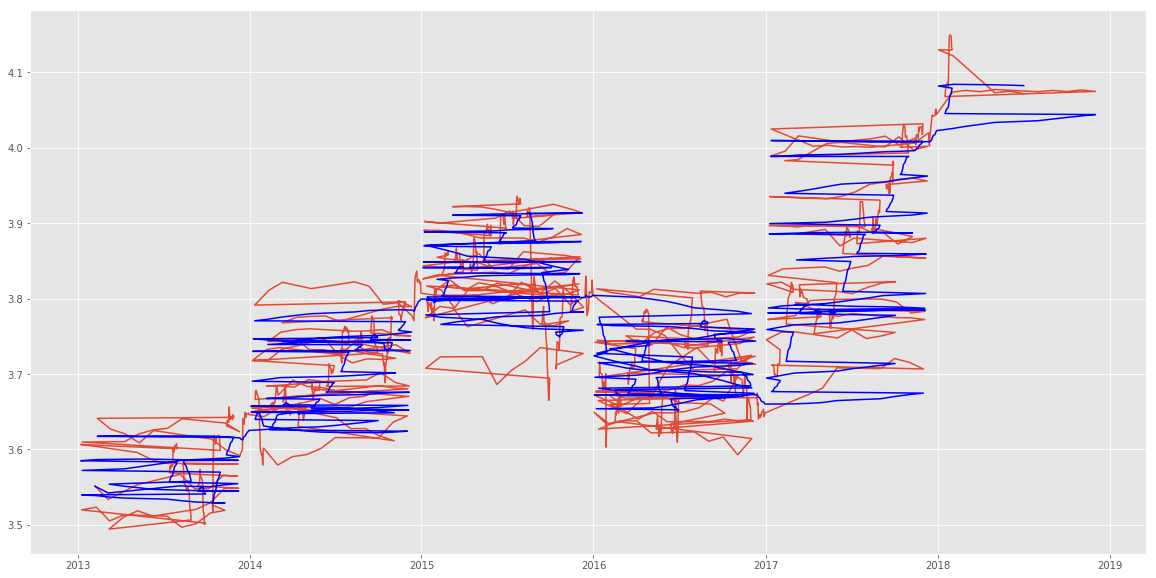

In [17]:
#Exponential Weighted mean (average) is something that applies weights to the most recent prices 
#we are doing EWM on an already log_scaled prices
exponentialDecayWeightedAverage = dfABT_logScale.ewm(halflife= 12,min_periods= 0,adjust=True).mean()
plt.plot(dfABT_logScale)
plt.plot(exponentialDecayWeightedAverage,color='blue')

Test Statistic            -6.023284e+00
p-value                    1.476207e-07
#lags used                 0.000000e+00
No of observations used    1.159000e+03
Critical value (1%)       -3.436005e+00
Critical value (5%)       -2.864037e+00
Critical value (10%)      -2.568099e+00
dtype: float64
Time series is most likely Stationary


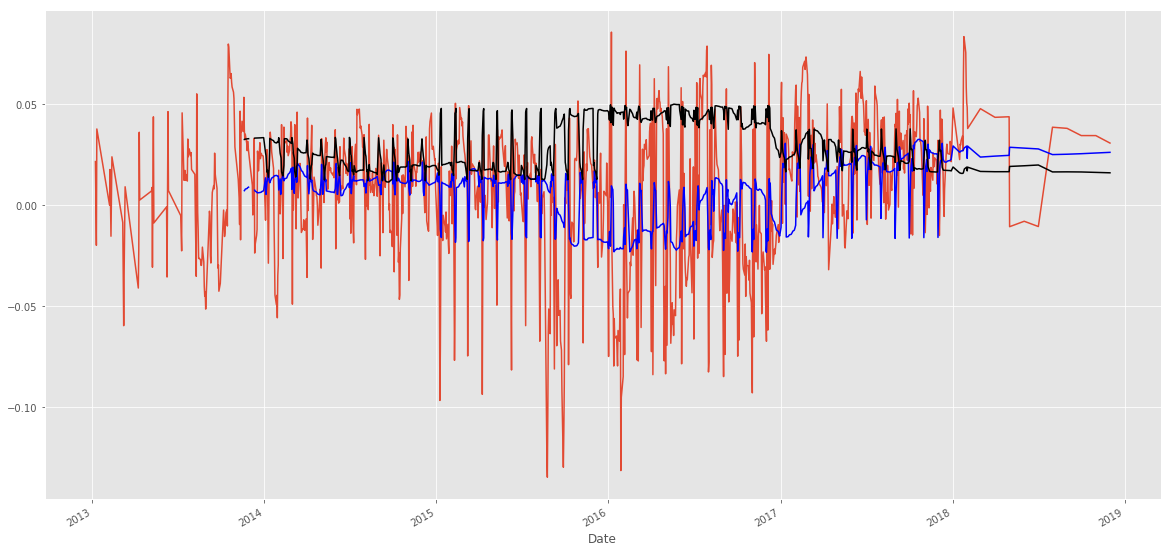

In [18]:
logScaleMinusexponentialDecayWeightedAverage = dfABT_logScale - exponentialDecayWeightedAverage
test_stationarity(logScaleMinusexponentialDecayWeightedAverage)

# Components of Time series

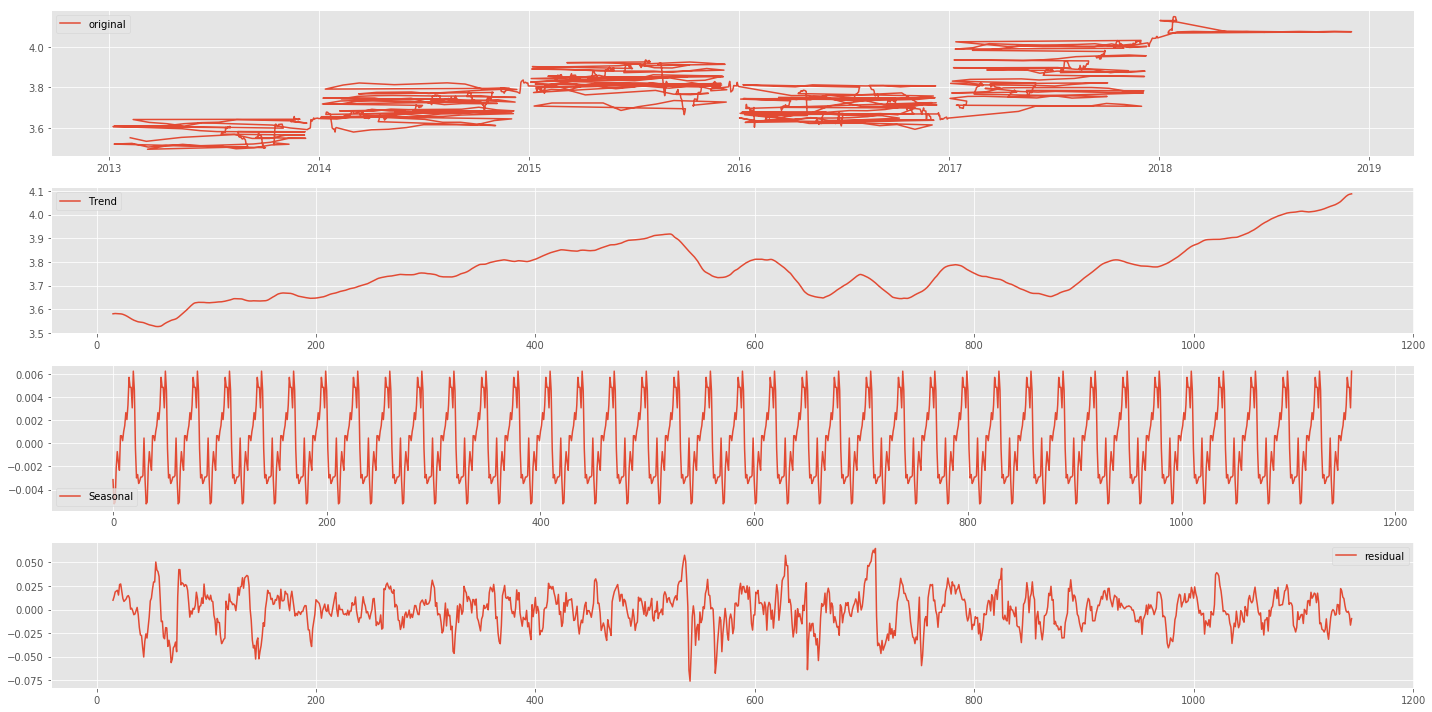

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
dfABT_logScale.dropna()
decomposition = seasonal_decompose(dfABT_logScale.values,freq=30)
 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dfABT_logScale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

#decomposedLogData = residual
#test_stationarity(decomposedLogData)

# Testing Integration of Order 0(Stationarity testing)

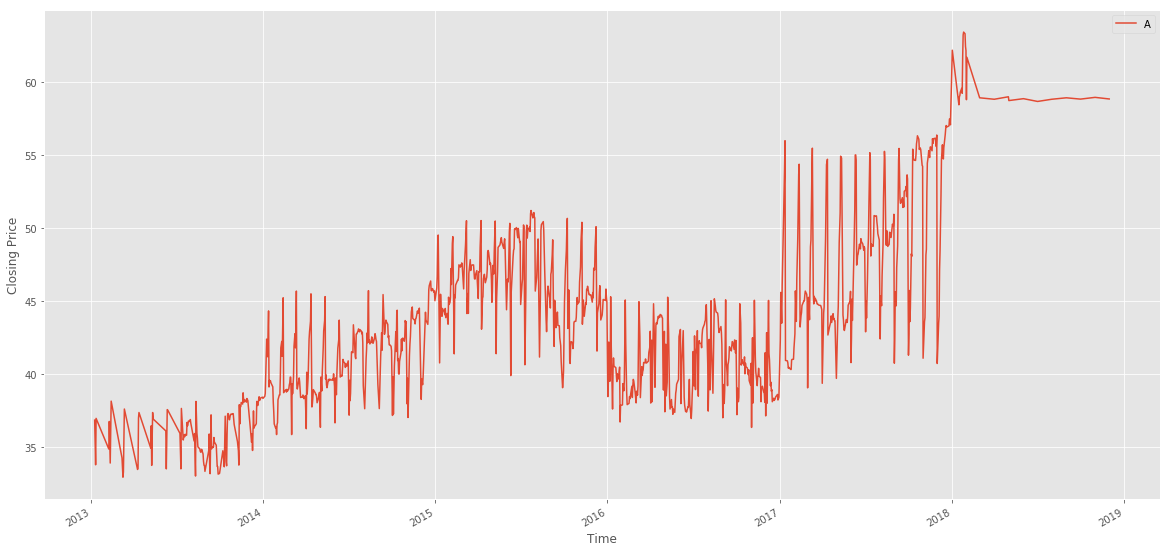

In [20]:
#dfABT_logScale.plot()
dfABT['close'].plot()
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend('ABT Closing Price series')



Test Statistic                1.454628
p-value                       0.997349
#lags used                    1.000000
No of observations used    1158.000000
Critical value (1%)          -3.436010
Critical value (5%)          -2.864039
Critical value (10%)         -2.568101
dtype: float64
Time series is most likely NOT stationary


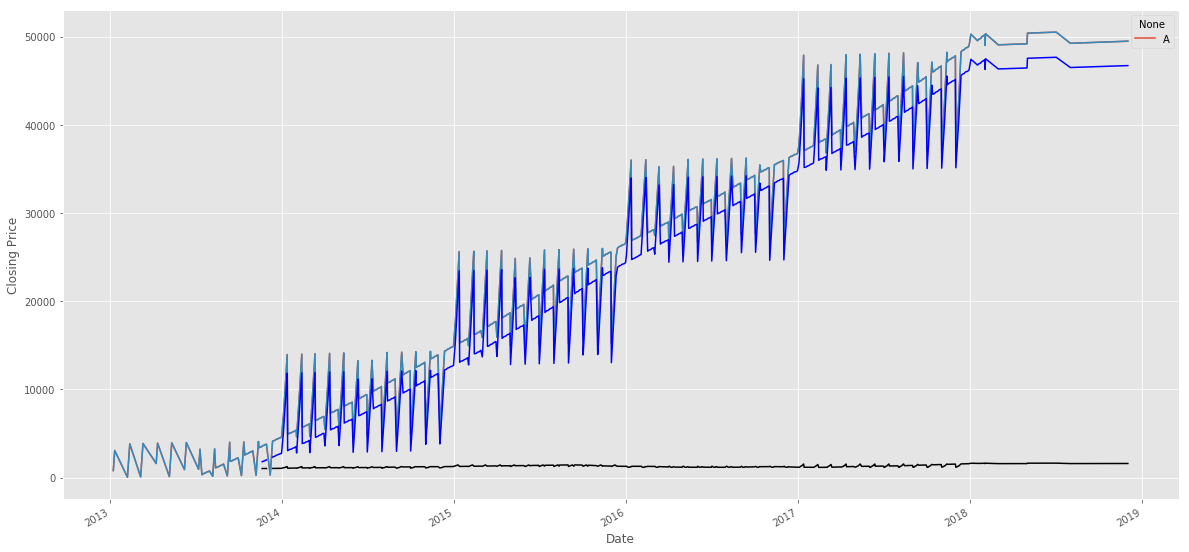

In [21]:
#Integration of order 1
ABT1 = np.cumsum(dfABT['close'])
ABT1.plot()
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend('ABT Closing Price series')
test_stationarity(ABT1)

Test Statistic                1.738051
p-value                       0.998218
#lags used                    2.000000
No of observations used    1157.000000
Critical value (1%)          -3.436015
Critical value (5%)          -2.864041
Critical value (10%)         -2.568102
dtype: float64
Time series is most likely NOT stationary


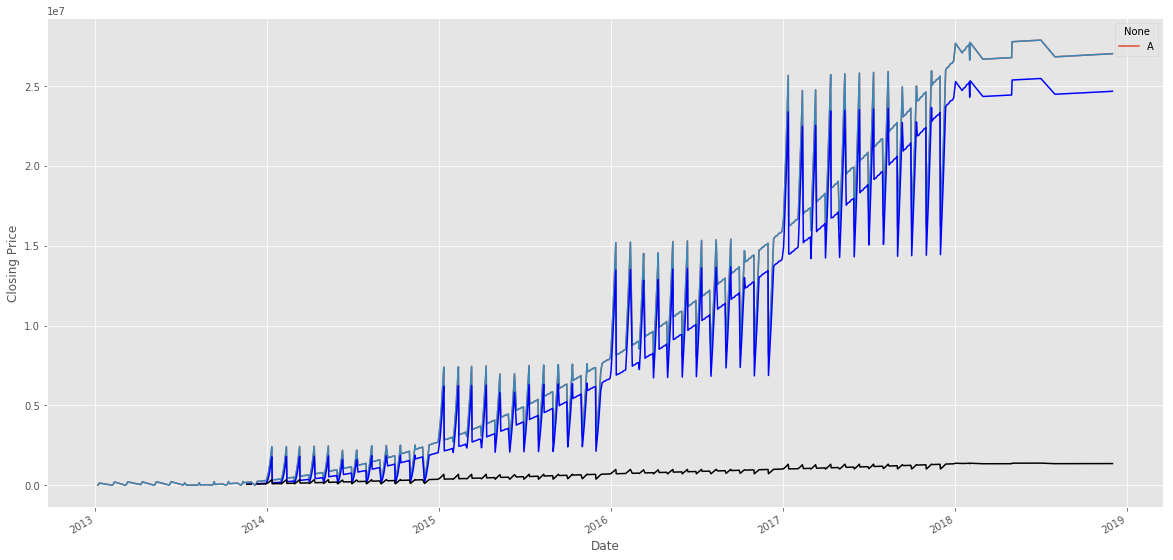

In [22]:
#Integration of order 2
ABT2 = np.cumsum(ABT1)
ABT2.plot()
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend('ABT Closing Price series')
test_stationarity(ABT2)

# Check stationarity using first order differentiation 

Test Statistic               -0.846172
p-value                       0.805182
#lags used                    0.000000
No of observations used    1159.000000
Critical value (1%)          -3.436005
Critical value (5%)          -2.864037
Critical value (10%)         -2.568099
dtype: float64
Time series is most likely NOT stationary


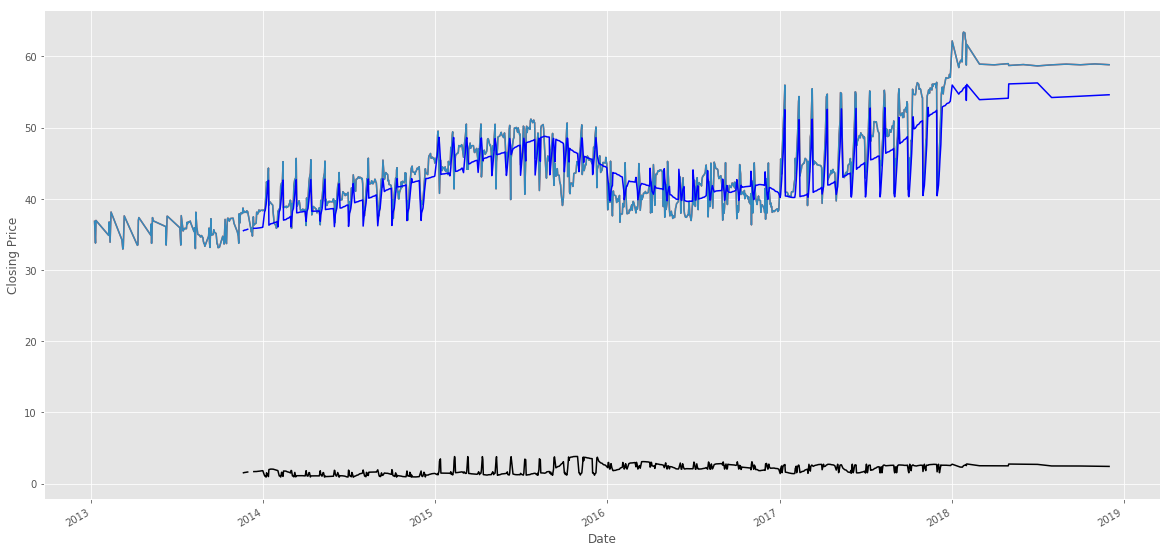

In [23]:
#original plot of closing prices
dfABT['close'].plot()
plt.xlabel('Time')
plt.ylabel('Closing Price')
test_stationarity(dfABT['close'])

Test Statistic              -33.696696
p-value                       0.000000
#lags used                    0.000000
No of observations used    1158.000000
Critical value (1%)          -3.436010
Critical value (5%)          -2.864039
Critical value (10%)         -2.568101
dtype: float64
Time series is most likely Stationary


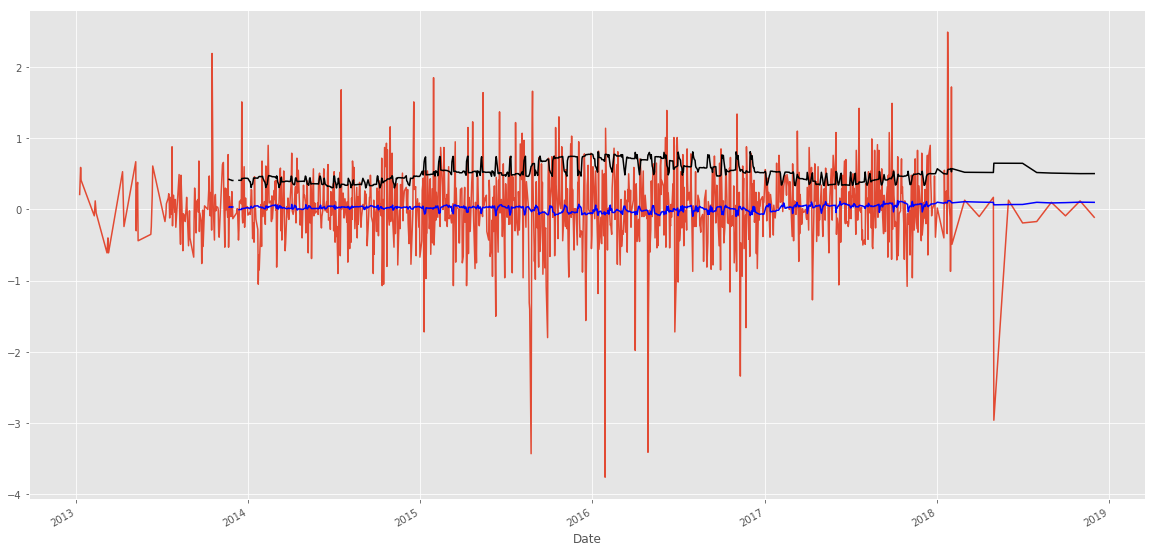

In [24]:
#plot of 1st order diffrentiated prices and checked stationarity
dfABT1 = dfABT['close'].diff()[1:]
test_stationarity(dfABT1)
#result = now its stationary from non stationary original values

# Checking cointegraion between a pair [APA, FDX]

In [25]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller


In [28]:
df1 = pd.DataFrame()
df1 = pd.read_csv('C:/Users/archana.parihar/Downloads/all_stocks_5yr1.csv', parse_dates=True,index_col=0)
dfAPA = df1.loc[df1['Name'] == 'APA']
dfFDX = df1.loc[df1['Name']== 'FDX']
print(dfAPA.head(5))

             open   high    low  close   volume Name
2013-08-02  84.13  85.18  84.11  84.65  2181859  APA
2013-11-02  84.81  85.47  83.73  83.81  2207403  APA
2013-12-02  84.06  84.43  83.33  84.18  2735842  APA
2013-02-13  84.18  84.43  83.70  84.33  3168636  APA
2013-02-14  83.72  84.00  80.11  80.33  8653948  APA


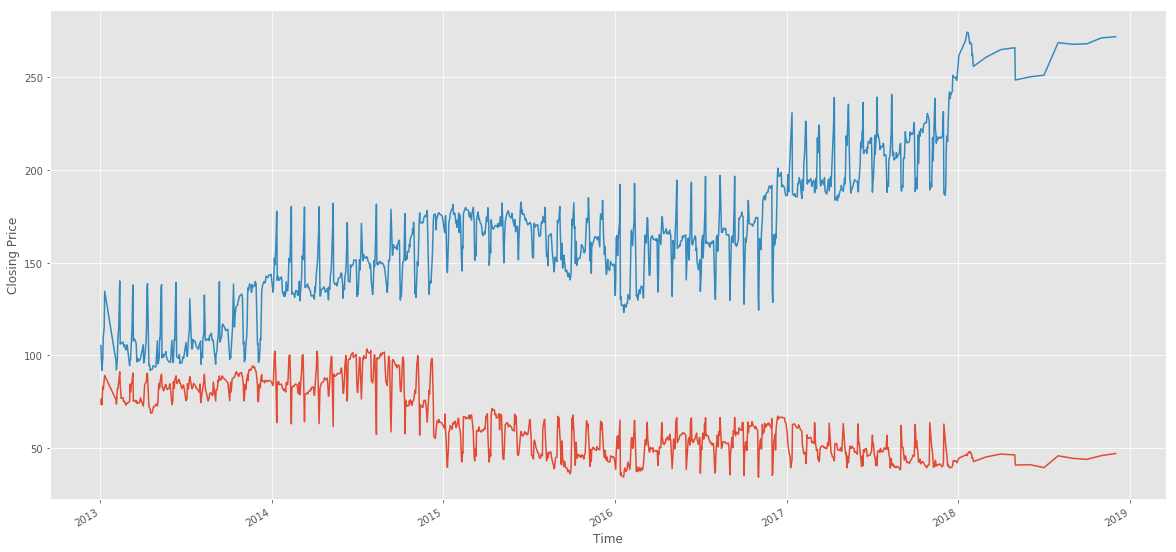

In [29]:
dfAPA['close'].plot()
dfFDX['close'].plot()
plt.xlabel('Time')
plt.ylabel('Closing Price')
dfAPA1 = dfAPA

In [30]:
#Using linear regression to calculate B'

dfAPA1 = sm.add_constant(dfAPA1)
print(dfAPA1.head())
results = sm.OLS(dfFDX['close'],dfAPA1['close']).fit()

results.params
results.summary()

            const   open   high    low  close   volume Name
2013-08-02    1.0  84.13  85.18  84.11  84.65  2181859  APA
2013-11-02    1.0  84.81  85.47  83.73  83.81  2207403  APA
2013-12-02    1.0  84.06  84.43  83.33  84.18  2735842  APA
2013-02-13    1.0  84.18  84.43  83.70  84.33  3168636  APA
2013-02-14    1.0  83.72  84.00  80.11  80.33  8653948  APA


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     5543.
Date:                Wed, 27 Jun 2018   Prob (F-statistic):               0.00
Time:                        02:00:37   Log-Likelihood:                -7163.4
No. Observations:                1259   AIC:                         1.433e+04
Df Residuals:                    1258   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
close          2.2559      0.030     74.454      0.000       2.196       2.315
==============================================================================
Omnibus:                      244.489   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.428
Skew:                          -0.030   Prob(JB):                     1.12e-11
Kurtosis:                       2.021   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test Statistic                0.117742
p-value                       0.967252
#lags used                    0.000000
No of observations used    1258.000000
Critical value (1%)          -3.435559
Critical value (5%)          -2.863840
Critical value (10%)         -2.567995
dtype: float64
Time series is most likely NOT stationary


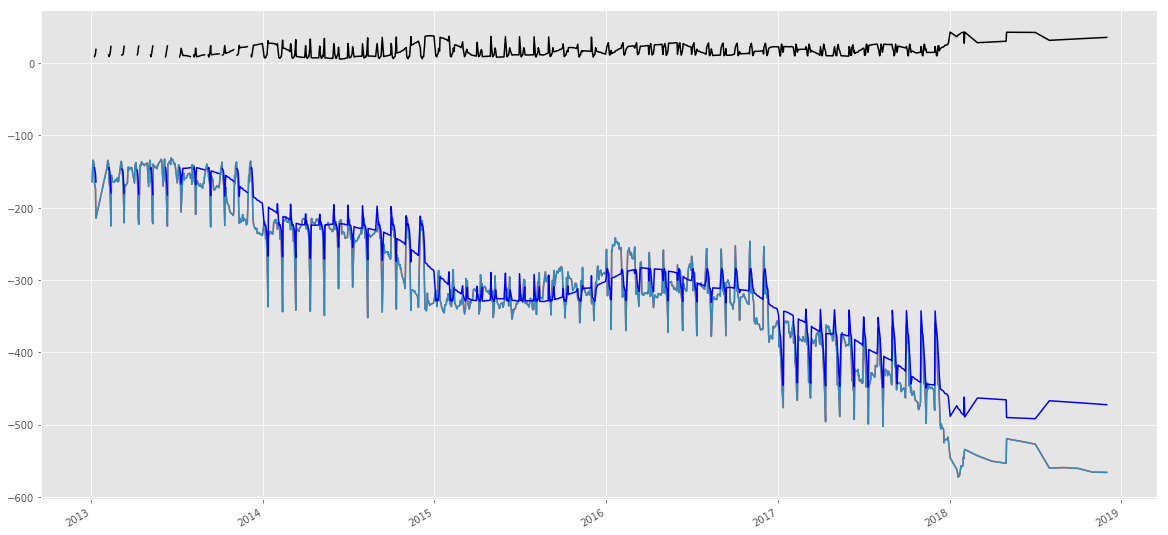

In [31]:
b = results.params['close']
z = dfAPA1['close'] - (b * dfFDX['close'])
z.plot()
test_stationarity(z)

In [32]:
#Built in coint test 
coint(dfAPA1['close'],dfFDX['close'])

(-1.9612800762122153,
 0.548637055661815,
 array([-3.90516699, -3.34099131, -3.0478231 ]))

# Time Series Moving Average plotting and analysis

In [33]:
dfABT = df.loc[df['Name'] == 'ABT']
print(dfABT.tail())

             open     high    low  close    volume Name    100MA
Date                                                            
2018-01-02  61.75  62.5400  61.66  62.18   8101584  ABT  55.9837
2018-02-02  62.20  62.4200  61.64  61.69  12346542  ABT  56.0761
2018-05-02  61.60  61.8700  58.55  58.73  11548229  ABT  56.1409
2018-06-02  57.92  59.2606  57.33  58.86  15214679  ABT  56.2095
2018-07-02  58.60  59.8500  58.50  58.67   6872663  ABT  56.2793


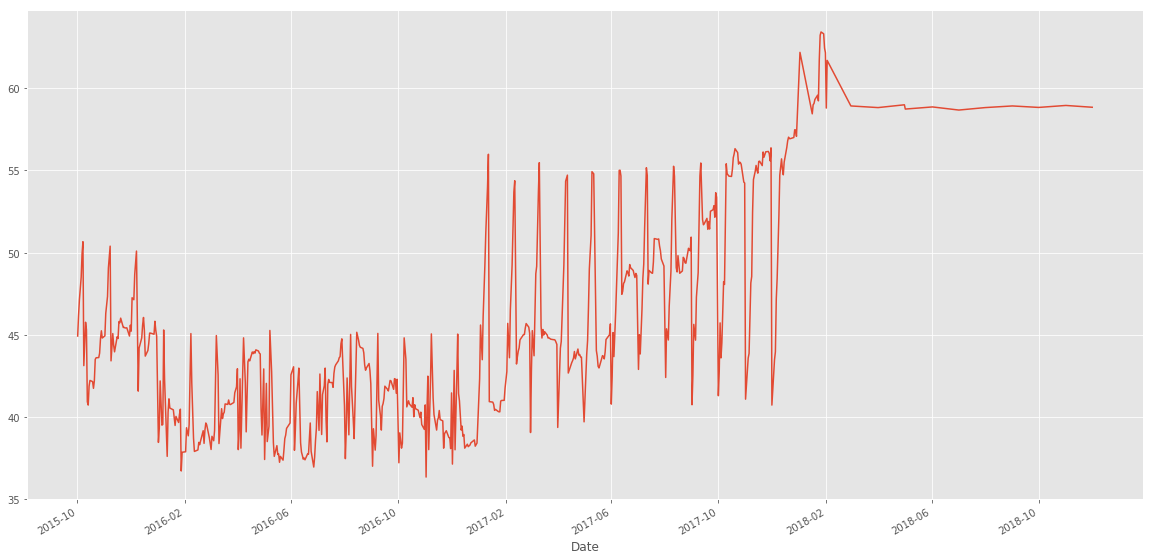

In [34]:
#sliced close price from october 2015 to end of dataset
dfABT['close']['2015-10-01':].plot()
plt.show()

<BarContainer object of 1160 artists>

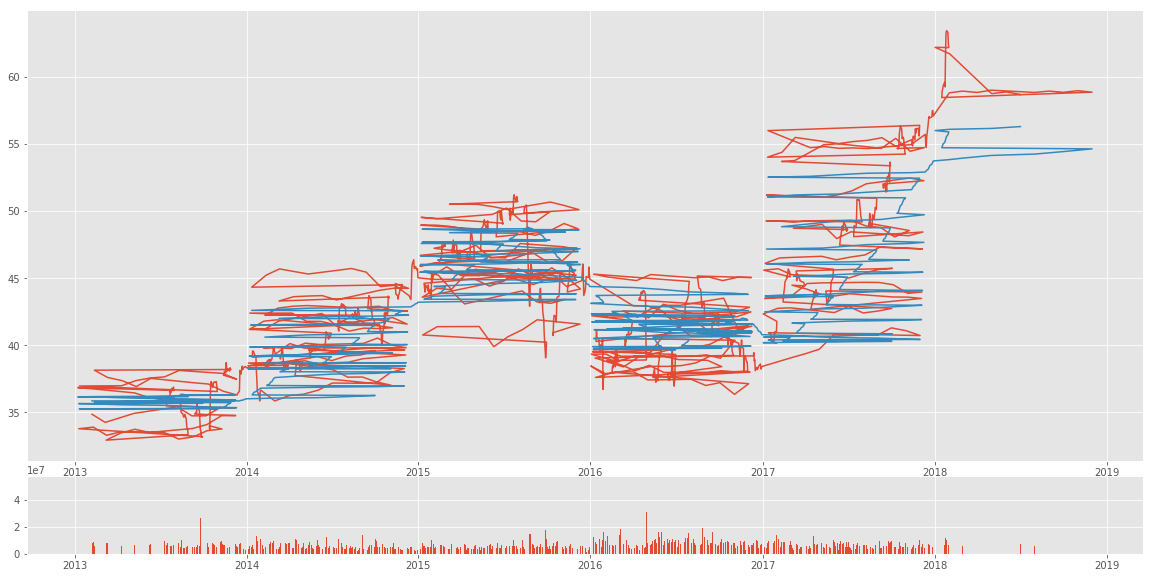

In [37]:
#create subplots
#since volume is large, we have seperated it into a bar
ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.plot(dfABT.index,dfABT['close'])
ax1.plot(dfABT.index,dfABT['100MA'])
ax2.bar(dfABT.index,dfABT['volume'])

# Candle Stick (Open , High, Low, Close Graph)


# Time Series Volatility

In [39]:
def stockChange(prices):
    return (prices - prices.shift(1))/prices.shift(1)

ABTChanges = stockChange(dfABT['close'])
ABTChanges

Date
2013-02-07         NaN
2013-03-07   -0.017499
2013-05-07    0.019562
2013-08-07    0.014032
2013-09-07   -0.018921
2013-10-07    0.000000
2013-11-07    0.018135
2013-12-07   -0.001414
2013-07-15    0.004530
2013-07-16    0.006201
2013-07-17    0.003361
2013-07-18   -0.003350
2013-07-19    0.004762
2013-07-22   -0.001951
2013-07-23    0.024581
2013-07-24   -0.006270
2013-07-25    0.003567
2013-07-26    0.005467
2013-07-29   -0.001088
2013-07-30    0.003811
2013-07-31   -0.006779
2013-01-08    0.005733
2013-02-08   -0.002443
2013-05-08   -0.008163
2013-06-08   -0.009602
2013-07-08   -0.004709
2013-08-08   -0.000278
2013-09-08   -0.000835
2013-12-08    0.000279
2013-08-13    0.001114
                ...   
2017-12-26    0.001230
2017-12-27    0.008246
2017-12-28   -0.000174
2017-12-29   -0.006787
2018-02-01    0.030138
2018-03-01    0.002211
2018-04-01   -0.001697
2018-05-01    0.002890
2018-08-01   -0.002882
2018-09-01    0.001700
2018-10-01   -0.001527
2018-11-01    0.002040
2018-1